<a href="https://colab.research.google.com/github/ChauNgocHoang/Chau-Ngoc-Hoang/blob/main/NDTien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [6]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/tien/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 171 images belonging to 9 classes.


In [7]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/tien/validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 44 images belonging to 9 classes.


In [8]:
training_set.class_indices

{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [9]:
validation.class_indices

{'100k': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '20K': 4,
 '2K': 5,
 '500K': 6,
 '50K': 7,
 '5K': 8}

In [10]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [20]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=50,batch_size=128)

Epoch 1/50
6/6 [==============================] - 30s 4s/step - loss: 21.1855 - accuracy: 0.1462
Epoch 2/50
6/6 [==============================] - 29s 4s/step - loss: 2.2308 - accuracy: 0.1520
Epoch 3/50
6/6 [==============================] - 28s 4s/step - loss: 2.2023 - accuracy: 0.1696
Epoch 4/50
6/6 [==============================] - 28s 4s/step - loss: 2.3302 - accuracy: 0.1170
Epoch 5/50
6/6 [==============================] - 28s 4s/step - loss: 2.1862 - accuracy: 0.1345
Epoch 6/50
6/6 [==============================] - 28s 5s/step - loss: 2.4385 - accuracy: 0.1170
Epoch 7/50
6/6 [==============================] - 28s 4s/step - loss: 2.1741 - accuracy: 0.1462
Epoch 8/50
6/6 [==============================] - 28s 4s/step - loss: 2.3540 - accuracy: 0.1404
Epoch 9/50
6/6 [==============================] - 28s 4s/step - loss: 2.1994 - accuracy: 0.1345
Epoch 10/50
6/6 [==============================] - 28s 4s/step - loss: 2.1411 - accuracy: 0.1754
Epoch 11/50
6/6 [=====================

In [21]:
model.save("TIEN.h5")

In [22]:
model_CNN=load_model('TIEN.h5')

1/1 [==============================] - 0s 145ms/step
10K


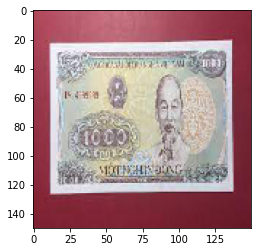

1/1 [==============================] - 0s 62ms/step
2K


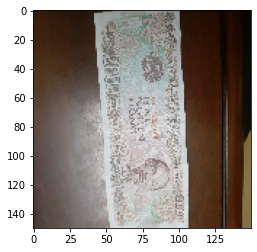

1/1 [==============================] - 0s 58ms/step
50K


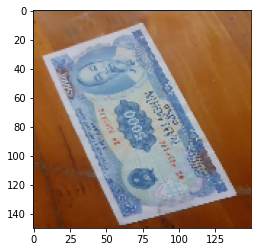

1/1 [==============================] - 0s 63ms/step
10K


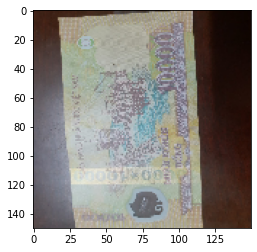

1/1 [==============================] - 0s 68ms/step
20K


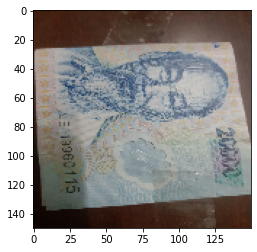

1/1 [==============================] - 0s 56ms/step
50K


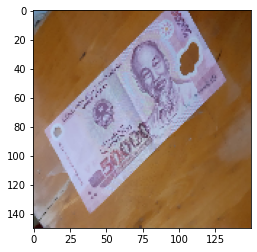

1/1 [==============================] - 0s 56ms/step
100K


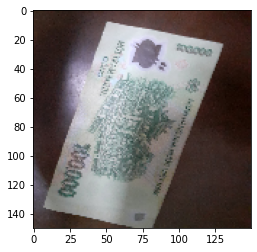

1/1 [==============================] - 0s 57ms/step
200K


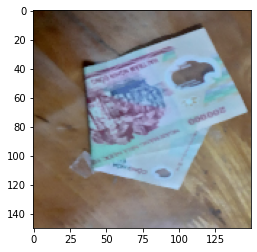

1/1 [==============================] - 0s 59ms/step
500K


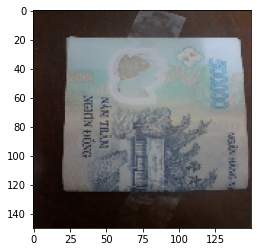

In [23]:
test="/content/drive/MyDrive/Colab Notebooks/tien/test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='100K'
  if round(result[0][1])==1:
    prediction='10K'
  if round(result[0][2])==1:
    prediction='1K'
  if round(result[0][3])==1:
    prediction='200K'
  if round(result[0][4])==1:
    prediction='20K'
  if round(result[0][5])==1:
    prediction='2K'
  if round(result[0][6])==1:
    prediction='500K'
  if round(result[0][7])==1:
    prediction='50K'
  if round(result[0][8])==1:
    prediction='5K'
  print(prediction)
  plt.show()